In [23]:
#Import bibliotek
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Wczytanie danych
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')



Ilość zamachów w poszczególnych latach

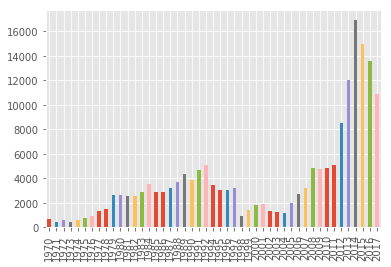

In [24]:
data['iyear'].value_counts().sort_index().plot(kind='bar')

Kraje z największą ilością zamachów samobójczych

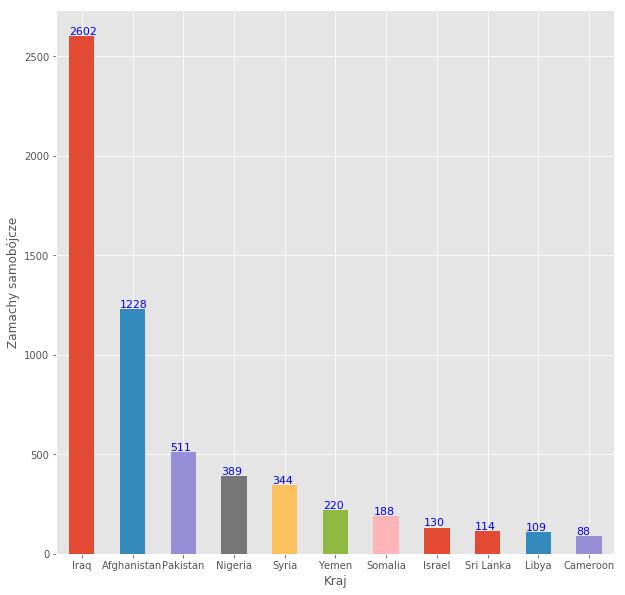

In [25]:
suic = data.groupby(['country_txt'])['suicide'].sum().reset_index()
suic = suic.sort_values(by = ['suicide'], ascending = False).reset_index()
suic = suic.loc[0:10, ['country_txt', 'suicide']]
suic = suic.plot.bar(x='country_txt', y='suicide', legend = False, rot=0, figsize = (10,10))
suic.set_xlabel("Kraj")
suic.set_ylabel("Zamachy samobójcze")
for i in suic.patches:
    suic.text(i.get_x(), i.get_height()+10, \
            str(round((i.get_height()), 2)), fontsize=11,
                color='blue')

Najczęstsze rodzaje ataków na wybrane cele

In [26]:
#data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1', usecols = [1,2,8,10,26,29,35,98,101])
attype_target = data.groupby(['attacktype1_txt','targtype1_txt']).size().reset_index(name='Attacks').sort_values('Attacks',ascending=False).drop_duplicates(['targtype1_txt'])
result = pd.DataFrame(data = attype_target)
result.style
 
#print(attype_target)

,attacktype1_txt,targtype1_txt,Attacks
56,Bombing/Explosion,Private Citizens & Property,20144
45,Bombing/Explosion,Business,12020
52,Bombing/Explosion,Military,11879
55,Bombing/Explosion,Police,10117
49,Bombing/Explosion,Government (General),8214
63,Bombing/Explosion,Utilities,5452
62,Bombing/Explosion,Unknown,5376
61,Bombing/Explosion,Transportation,4335
46,Bombing/Explosion,Educational Institution,2232
57,Bombing/Explosion,Religious Figures/Institutions,2084


Liczba rannych i zabitych przeliczona na jeden atak

In [27]:
country_attacks = data.groupby(['country_txt']).size().to_frame('Attacks')

country_attacks['country_txt']=country_attacks.index

year_country=data.groupby(['iyear','country_txt']).size().reset_index(name="Attacks")

injuried = data.groupby('country_txt')['nwound'].agg(['sum']).rename(columns={'sum':'injuries'})

#print(injuried)

fatalities = data.groupby('country_txt')['nkill'].agg(['sum']).rename(columns={'sum':'nkill'})

#print(fatalities)

injuried_fatalities=pd.concat([fatalities,injuried['injuries'],country_attacks['Attacks'],(fatalities['nkill']/country_attacks['Attacks']).rename("Deaths/attack"),(injuried['injuries']/country_attacks['Attacks']).rename("Injuries/attack")],axis=1)

injuried_fatalities=injuried_fatalities.rename_axis("country_txt", axis="columns").rename_axis('')

injuried_fatalities['country_txt']=injuried_fatalities.index
result = pd.DataFrame(data = injuried_fatalities)
result.style


country_txt,nkill,injuries,Attacks,Deaths/attack,Injuries/attack,country_txt
,,,,,,
Afghanistan,39384,44277,12731,3.09355,3.47789,Afghanistan
Albania,42,126,80,0.525,1.575,Albania
Algeria,11066,9150,2743,4.03427,3.33576,Algeria
Andorra,0,0,1,0,0,Andorra
Angola,3043,2455,499,6.0982,4.91984,Angola
Antigua and Barbuda,0,0,1,0,0,Antigua and Barbuda
Argentina,490,755,815,0.601227,0.92638,Argentina
Armenia,37,71,24,1.54167,2.95833,Armenia
Australia,23,113,114,0.201754,0.991228,Australia


Ilość zamachów w zależności od regionu w latach 2010-2017

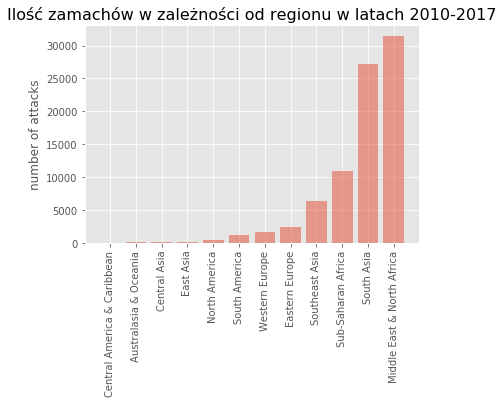

In [28]:
data_past_10 = data.loc[data['iyear'] > 2010]

region_sum = []
for region in np.unique(data_past_10['region_txt']):
    region_sum.append((region, data_past_10.loc[data_past_10['region_txt'] == region].shape[0]))    
region_sum = sorted(region_sum, key = lambda x: x[1])

plt.style.use('ggplot')
plt.bar(np.arange(len(region_sum)), [float(value[1]) for value in region_sum], align = 'center', alpha = 0.5)
plt.xticks(np.arange(len(region_sum)), [value[0] for value in region_sum], rotation = 'vertical')
plt.ylabel('number of attacks')
plt.title('Ilość zamachów w zależności od regionu w latach 2010-2017', fontsize = 16)
plt.show()